<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/PyCaretAssociationRuleMining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyCaret Association Rules brief




1.   The Apriori is an algorithm used for identifying item sets which occur frequently in a set of transactions.
2.   The Pycaret association rule module transforms databases containing transactions into shapes best accepted for the apriori algorithm.


3.   The rules generated provided important information on how the purchase of one or more items implies interest in the purchase of one or more further items.
4.   These insights can be used for marketing decisions such as promotional activities, product placement in retail stores etc.





In [1]:
 #install related dependencies
!pip install markupsafe==2.0.1
import jinja2

  Preparing metadata (setup.py) ... done
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-linux_x86_64.whl size=27993 sha256=0bc0fe20e4eef0c6248e13b7930a66a0ed801a803331cec89f1a56dff917b3fb
  Stored in directory: /root/.cache/pip/wheels/ea/18/79/6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 3.1.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvid

In [4]:
!pip install pycaret -q

In [ ]:
#to use pycaret in Google Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


#Workflow in Pycaret



1.   Download dataset
2.   Use setup to transform the dataset as required


3.   Create model with default parameters, then with specified parameters
4.   Examine the model


5.   Plot the model
6.   Draw necessary conclusions








In [2]:
#import data from pycaret's inbuilt datasets
from pycaret.datasets import get_data
data = get_data('france')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [15]:
#
#get the size of the dataset
data.shape

(8557, 8)

In [16]:
#get further information on the dataset's categorical variables
import pandas as pd
data.astype('category').describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,8557,8557,8557,8557,8557,8557.00,8491.0,8557
unique,461,1543,1565,77,461,97.00,87.0,1
top,570672,POST,POSTAGE,12,10/11/2011 14:52,1.65,12681.0,France
freq,259,311,311,2095,259,1033.00,646.0,8557


In [17]:
#items in the dataset
items = data['Description'].value_counts()
items

,count
Description,
POSTAGE,311
RABBIT NIGHT LIGHT,75
RED TOADSTOOL LED NIGHT LIGHT,72
PLASTERS IN TIN WOODLAND ANIMALS,68
PLASTERS IN TIN CIRCUS PARADE,68
...,...
JAZZ HEARTS ADDRESS BOOK,1
JAZZ HEARTS PURSE NOTEBOOK,1
HANGING HEART ZINC T-LIGHT HOLDER,1


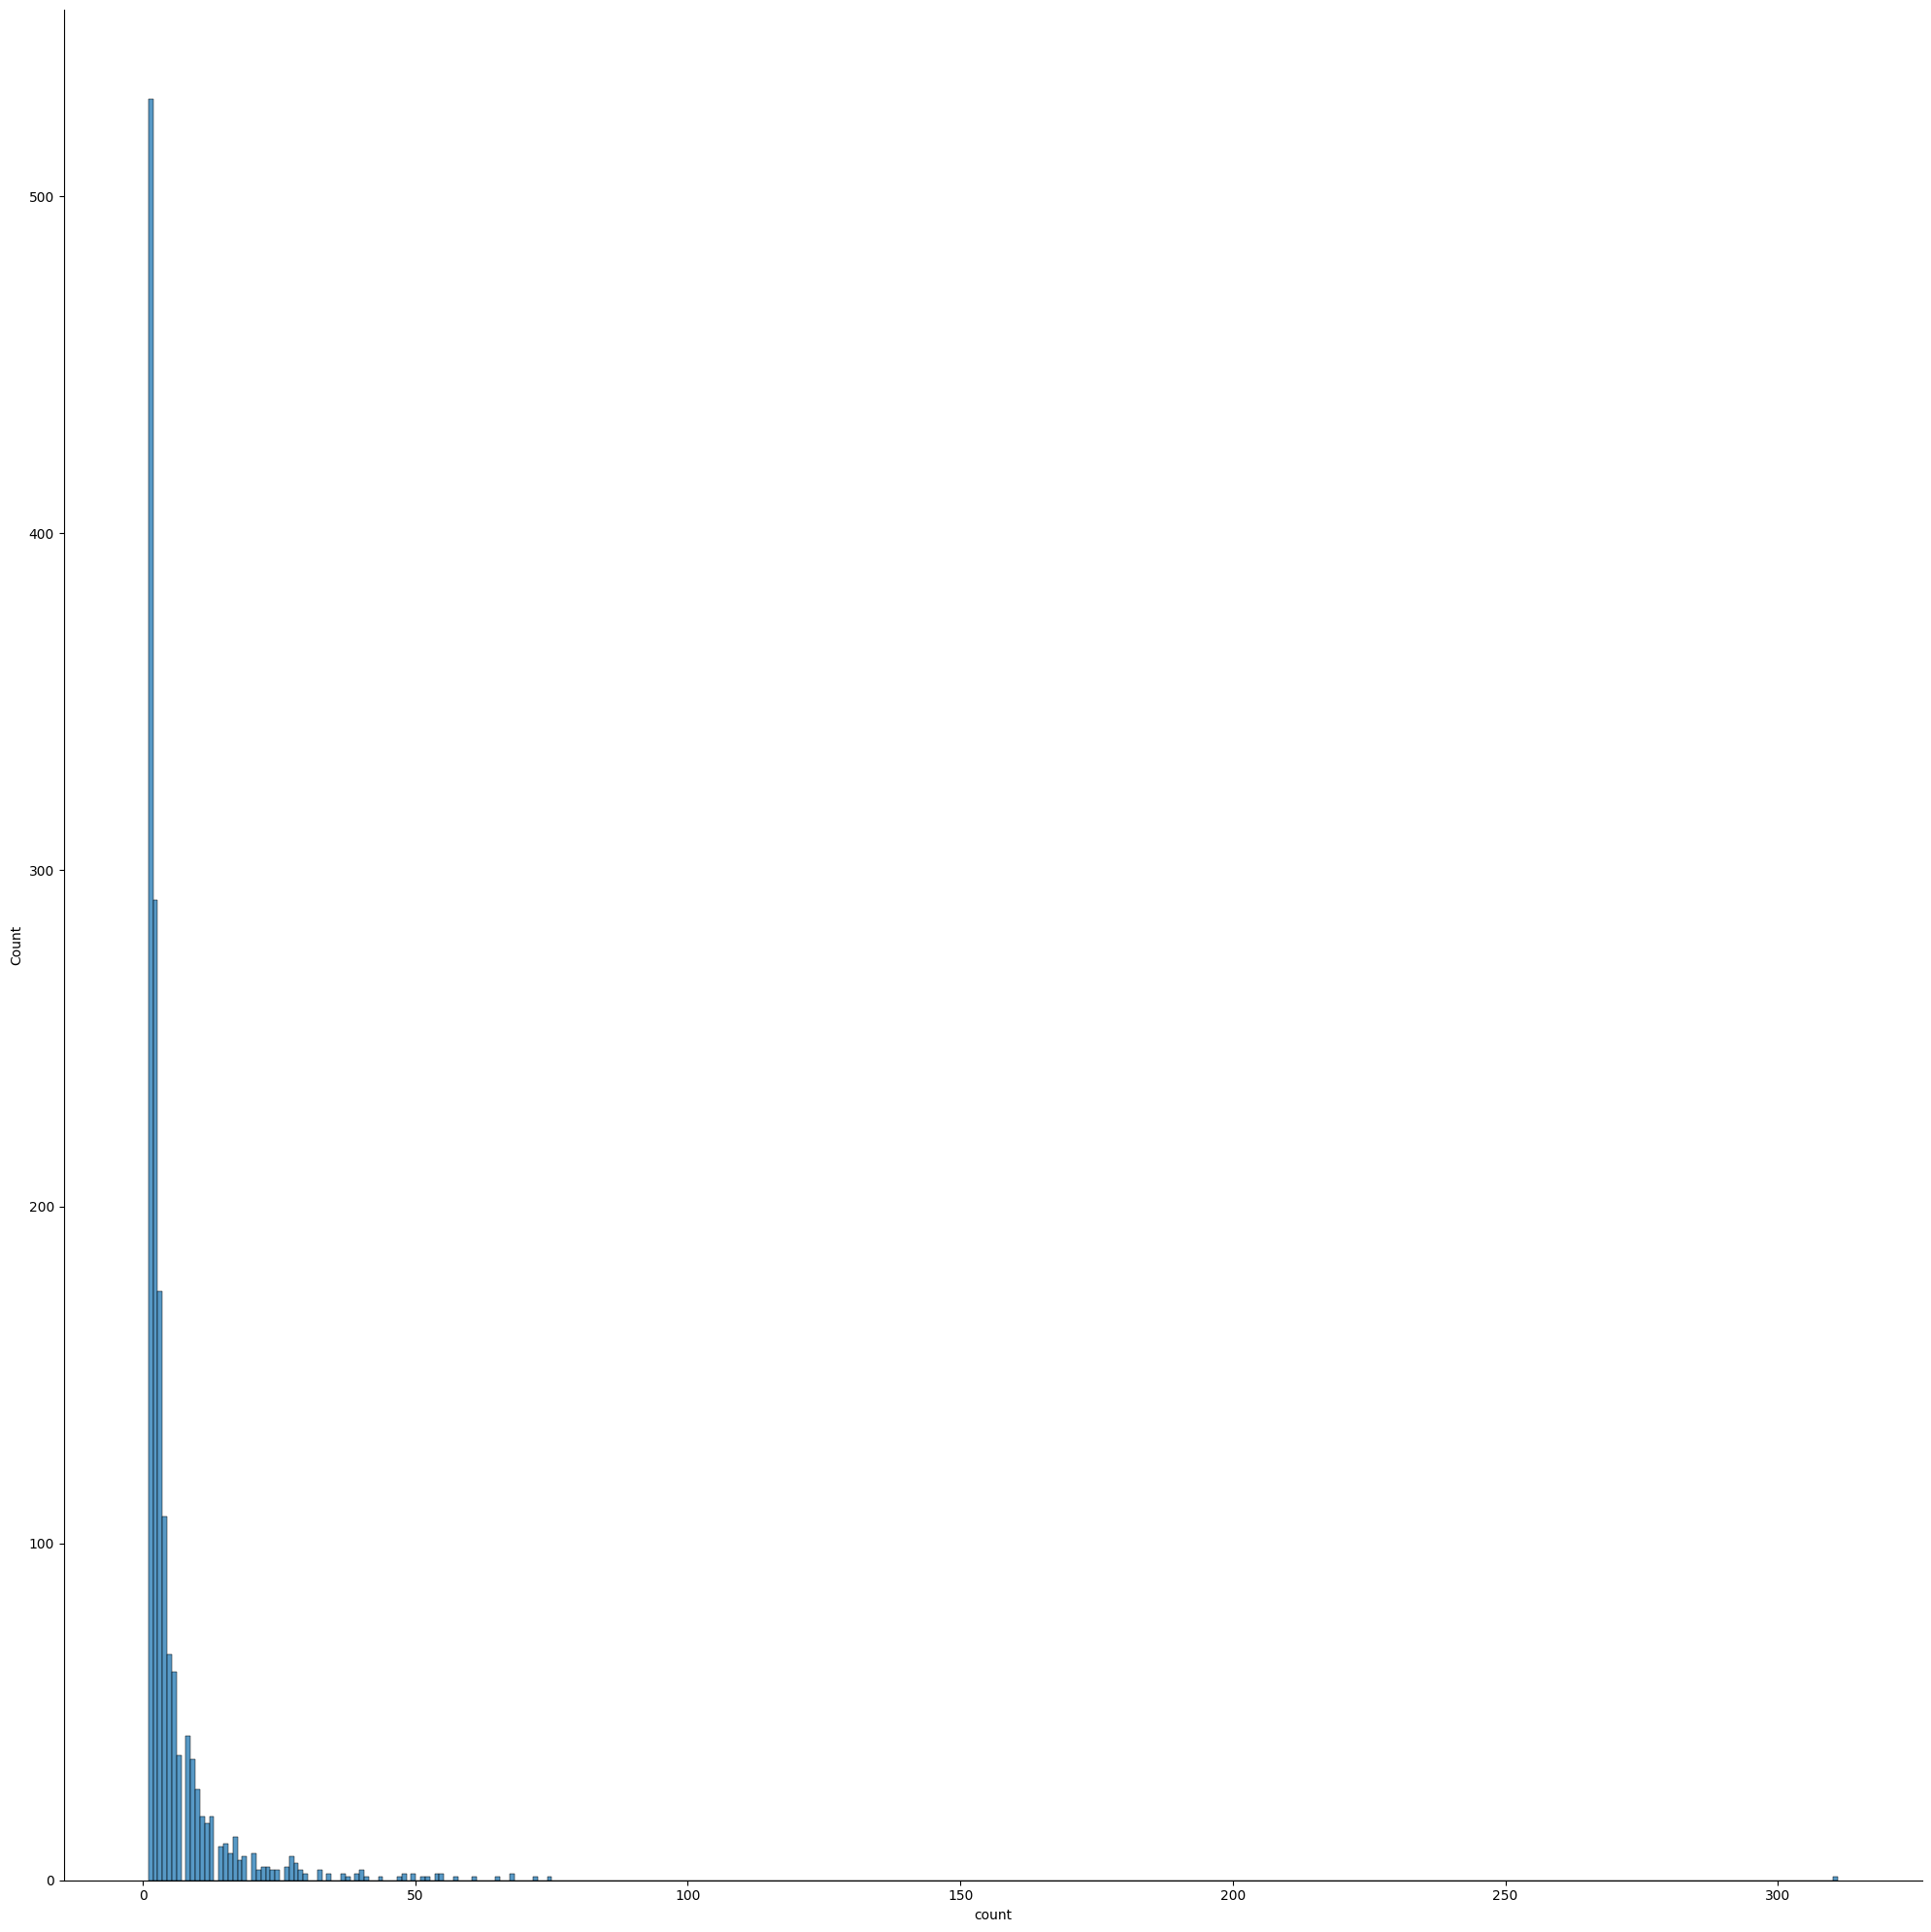

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=items, kind='hist', height=20, aspect=1)


From the histogram it is evident that there are a few items which are frequent in the dataset, as high as 300 occurrences. There seem to be less than 15 items which occur more than a 100 times. This helps us decide which items need to be eliminated for further analysis.

In [11]:
#import all rules from association rules in pycaret by using the asterisk symbol
#from pycaret.arules import *
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#PyCaret Setup for Association Rule Mining

This function initializes the environment in pycaret. setup() must called before
executing any other function in pycaret. It takes three mandatory parameters:
(i) data, (ii) transaction_id param identifying basket and (iii) item_id param
used to create rules.
transaction_id: Name of column representing transaction id. This will be used to pivot the matrix.
item_id: Name of column used for creation of rules. Normally, this will be the variable of interest.
ignore_items: Used to ignore specific items in the dataset

In [36]:
#exp_arul101 = setup(data = data,
#                    transaction_id = 'InvoiceNo',
#                    item_id = 'Description', ignore_items =
#                  ['POSTAGE'])


# Grouping by transaction (InvoiceNo)
basket = data.groupby('InvoiceNo')['Description'].apply(list)

# Converting to list of lists (transactions)
transactions = basket.tolist()


In [53]:
# Apply TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

#min_support=0.05 means "only keep itemsets that appear in at least 5% of all transactions."
# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate rules
#lets lift = 3
#If you buy A, you’re 3x more likely to also buy B compared to random chance
#min_threshold =  lift at leat at ...
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 10)

#Zhang: Okay, but is this rule actually surprising given how common ‘Milk’ is?”
#Zhang’s metric = smarter confidence
#It avoids being fooled by super-common items and gives you a truer measure of association. (>0 Positive Correlation, 0 = No Correlacion (random chance), <0 Negavitve Correlation))
rules.sort_values('lift', ascending=False).head(29)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.058568,0.062907,0.054230,0.925926,14.719029,1.0,0.050546,12.650759,0.990046,0.806452,0.920953,0.893997
1,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.062907,0.058568,0.054230,0.862069,14.719029,1.0,0.050546,6.825380,0.994630,0.806452,0.853488,0.893997
2,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED ),0.062907,0.080260,0.054230,0.862069,10.740913,1.0,0.049181,6.668113,0.967778,0.609756,0.850033,0.768872
5,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",0.080260,0.062907,0.054230,0.675676,10.740913,1.0,0.049181,2.889371,0.986038,0.609756,0.653904,0.768872
6,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED ),0.071584,0.080260,0.060738,0.848485,10.571663,1.0,0.054992,6.070282,0.975217,0.666667,0.835263,0.802621
7,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",0.080260,0.071584,0.060738,0.756757,10.571663,1.0,0.054992,3.816823,0.984417,0.666667,0.738002,0.802621
3,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE GREEN),0.062907,0.084599,0.054230,0.862069,10.190097,1.0,0.048908,6.636659,0.962407,0.581395,0.849322,0.751547
4,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",0.084599,0.062907,0.054230,0.641026,10.190097,1.0,0.048908,2.610474,0.985213,0.581395,0.616928,0.751547


In [60]:
rules['itemsets'].head()

,itemsets
0,frozenset({'CHILDRENS CUTLERY SPACEBOY '}) -> ...
1,frozenset({'CHILDRENS CUTLERY DOLLY GIRL '}) -...
2,"frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALAR..."
3,"frozenset({'ALARM CLOCK BAKELIKE RED ', 'ALARM..."
4,frozenset({'ALARM CLOCK BAKELIKE GREEN'}) -> f...


In [57]:
!pip install plotly


import plotly.express as px

# Create a new column for displaying itemsets as hover info
rules['itemsets'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

# Create a Plotly scatter plot
fig = px.scatter(
    rules,
    x='support',
    y='lift',
    hover_data=['itemsets', 'confidence'],  # Display itemsets and confidence when hovering
    title="Lift vs Support for Association Rules"
)

fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Lift',
    showlegend=False
)

fig.show()
